In [1]:
%matplotlib inline

In [2]:
# So we can use the *thesislib* package
import sys
import os

module_path = os.path.abspath("..")

if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from thesislib.utils import pathutils
import json

In [4]:
symptoms_csv = pathutils.get_data_file("04_06_new_data/data/symptoms.csv")

In [11]:
import pandas as pd
import numpy as np
from glob import glob

In [12]:
from thesislib.utils import knifeutils

In [13]:
generating_synthea_modules = glob(pathutils.get_data_file("04_06_new_data/data/modules/*.json"))
num_unique_conditions = len(generating_synthea_modules)

In [15]:
condition_symptom_map = {}
condition_name_map = {}
for module in generating_synthea_modules:
    condition_code, condition_name, symptom_list = knifeutils.extract_condition_symptom_from_modules(module)
    condition_symptom_map[condition_code] = symptom_list
    condition_name_map[condition_code] = condition_name

In [16]:
symptoms = pd.read_csv(symptoms_csv)

In [18]:
cond_grp = symptoms.groupby('PATHOLOGY')

In [26]:
grp1 = cond_grp.get_group('3f741ee898b131a072a9e185b153d6949913e7562e81e9bea0e1647f')

In [30]:
import matplotlib.pyplot as plt

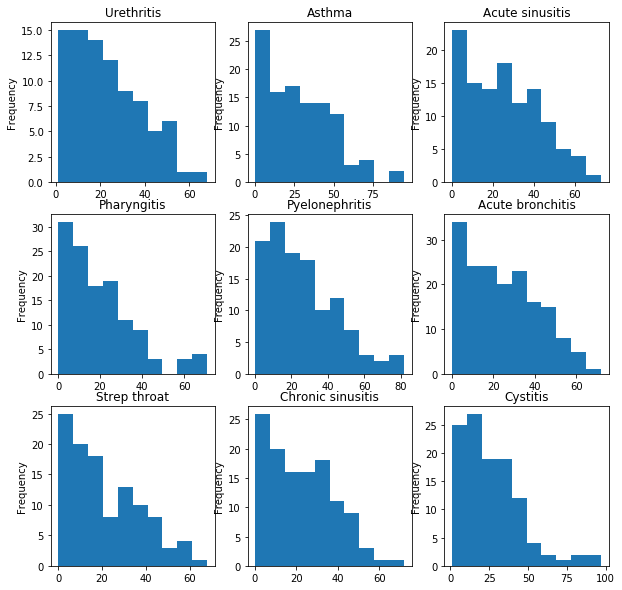

In [36]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
idx = 0
for cond, df in cond_grp.__iter__():
    xdx = idx // 3
    ydx = idx % 3
    ax = axes[xdx][ydx]
    cond_name = condition_name_map[cond]
    ax.set_title(cond_name)
    plt.sca(ax)
    df.AGE_BEGIN.plot.hist()
    idx += 1

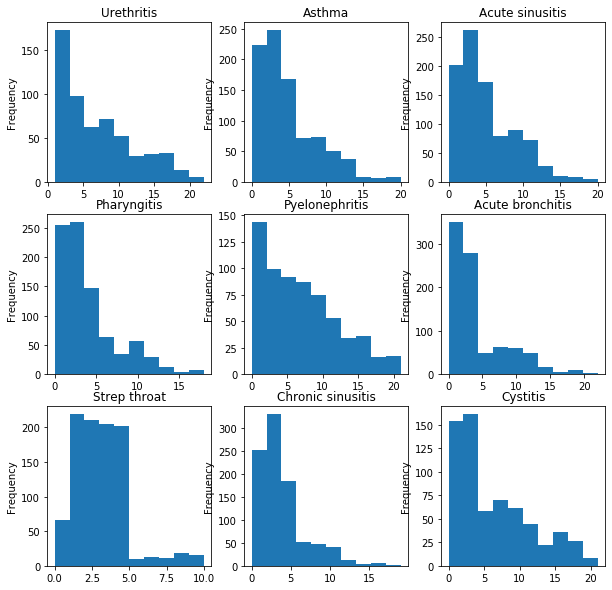

In [37]:
symptoms1_csv = pathutils.get_data_file("04_06_new_data/data/symptoms_04_16.csv")
symptoms1 = pd.read_csv(symptoms1_csv)
grp1 = symptoms1.groupby('PATHOLOGY')
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
idx = 0
for cond, df in grp1.__iter__():
    xdx = idx // 3
    ydx = idx % 3
    ax = axes[xdx][ydx]
    cond_name = condition_name_map[cond]
    ax.set_title(cond_name)
    plt.sca(ax)
    df.AGE_BEGIN.plot.hist()
    idx += 1

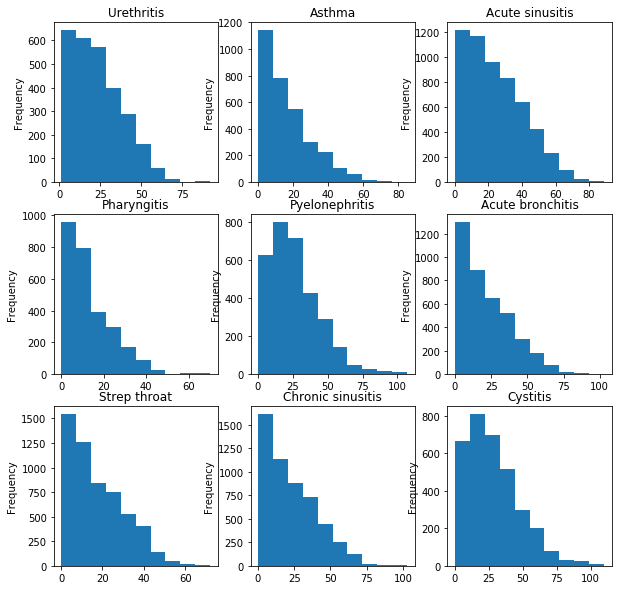

In [39]:
symptoms1_csv = pathutils.get_data_file("04_06_new_data/data/symptoms_04_16_1.csv")
symptoms1 = pd.read_csv(symptoms1_csv)
grp1 = symptoms1.groupby('PATHOLOGY')
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
idx = 0
for cond, df in grp1.__iter__():
    xdx = idx // 3
    ydx = idx % 3
    ax = axes[xdx][ydx]
    cond_name = condition_name_map[cond]
    ax.set_title(cond_name)
    plt.sca(ax)
    df.AGE_BEGIN.plot.hist()
    idx += 1

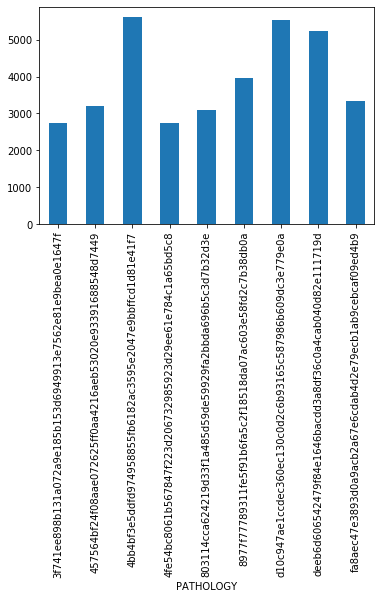

In [42]:
# how about size of each condition
dist = grp1.size()
dist.plot.bar()

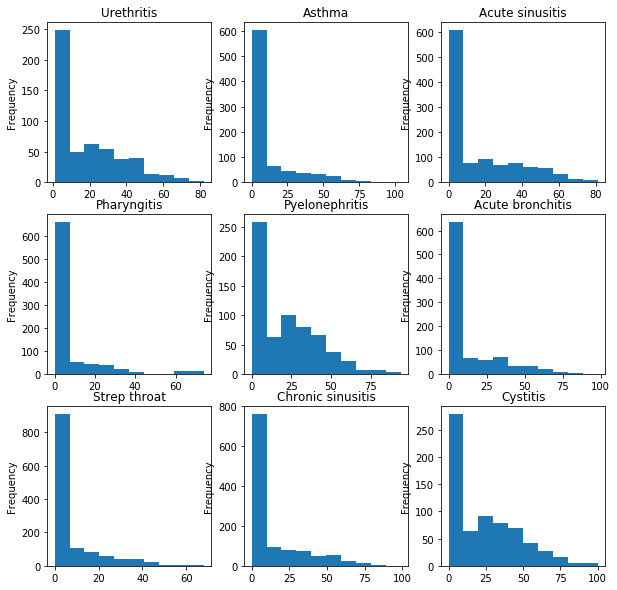

In [43]:
symptoms1_csv = pathutils.get_data_file("04_06_new_data/data/symptoms_04_16_2.csv")
symptoms1 = pd.read_csv(symptoms1_csv)
grp1 = symptoms1.groupby('PATHOLOGY')
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
idx = 0
for cond, df in grp1.__iter__():
    xdx = idx // 3
    ydx = idx % 3
    ax = axes[xdx][ydx]
    cond_name = condition_name_map[cond]
    ax.set_title(cond_name)
    plt.sca(ax)
    df.AGE_BEGIN.plot.hist()
    idx += 1

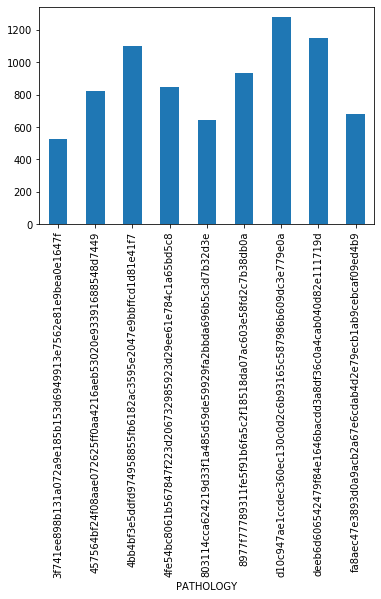

In [44]:
# how about size of each condition
dist = grp1.size()
dist.plot.bar()

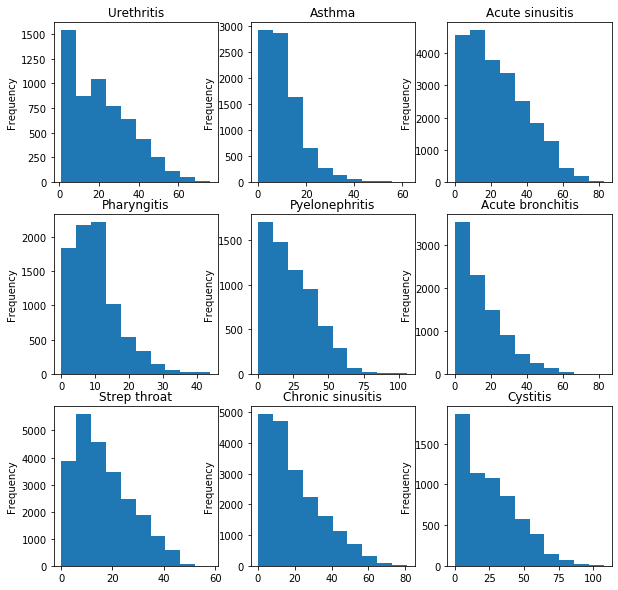

In [45]:
symptoms1_csv = pathutils.get_data_file("04_06_new_data/data/symptoms_04_16_3.csv")
symptoms1 = pd.read_csv(symptoms1_csv)
grp1 = symptoms1.groupby('PATHOLOGY')
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
idx = 0
for cond, df in grp1.__iter__():
    xdx = idx // 3
    ydx = idx % 3
    ax = axes[xdx][ydx]
    cond_name = condition_name_map[cond]
    ax.set_title(cond_name)
    plt.sca(ax)
    df.AGE_BEGIN.plot.hist()
    idx += 1

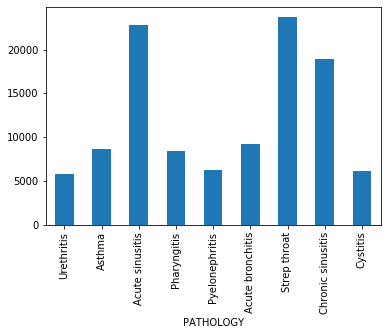

In [51]:
# how about size of each condition
dist = grp1.size()
dist.index = dist.index.map(lambda item: condition_name_map[item])
dist.plot.bar()

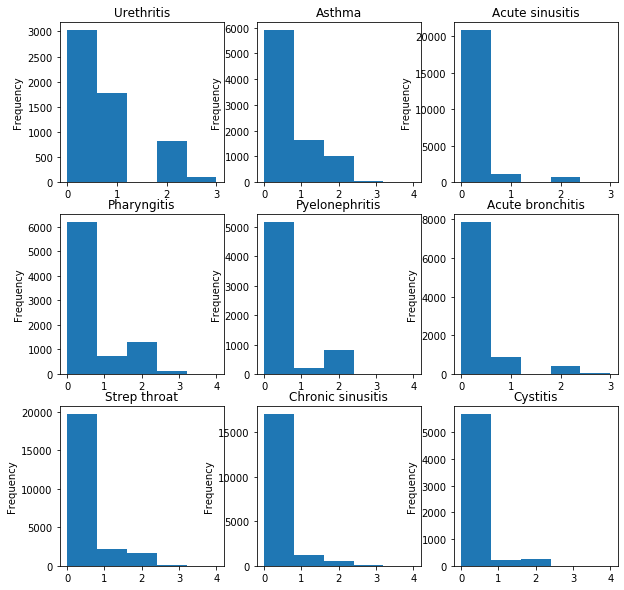

In [56]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
idx = 0
race_map = {'white': 0, 'black': 1, 'asian': 2, 'native': 3, 'other': 4}
for cond, df in grp1.__iter__():
    xdx = idx // 3
    ydx = idx % 3
    ax = axes[xdx][ydx]
    cond_name = condition_name_map[cond]
    ax.set_title(cond_name)
    plt.sca(ax)
    df.RACE.map(lambda x: race_map.get(x)).plot.hist(bins=5)
    idx += 1

In [57]:
race = symptoms1['RACE'].map(lambda x: race_map.get(x))

In [64]:
symptoms1.groupby('RACE').size()

RACE
asian      7540
black      9964
native      474
other        57
white     91679
dtype: int64

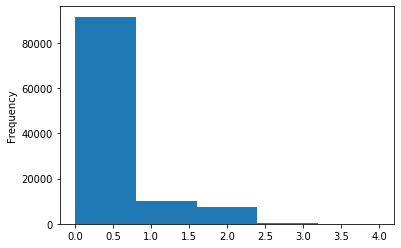

In [65]:
symptoms1.columns

Index(['PATIENT', 'GENDER', 'RACE', 'ETHNICITY', 'AGE_BEGIN', 'AGE_END',
       'PATHOLOGY', 'NUM_SYMPTOMS', 'SYMPTOMS'],
      dtype='object')

In [66]:
population_race = symptoms1.groupby('PATIENT').RACE

In [72]:
race1 = population_race.unique()

In [75]:
race1 = race1.map(lambda x: x[0])

In [77]:
race1 = race1.map(lambda x: race_map.get(x))

In [79]:
values = race1.values

(array([833.,   0.,  97.,   0.,   0.,  78.,   0.,   5.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

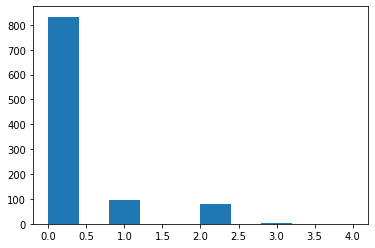

In [81]:
plt.hist(values)

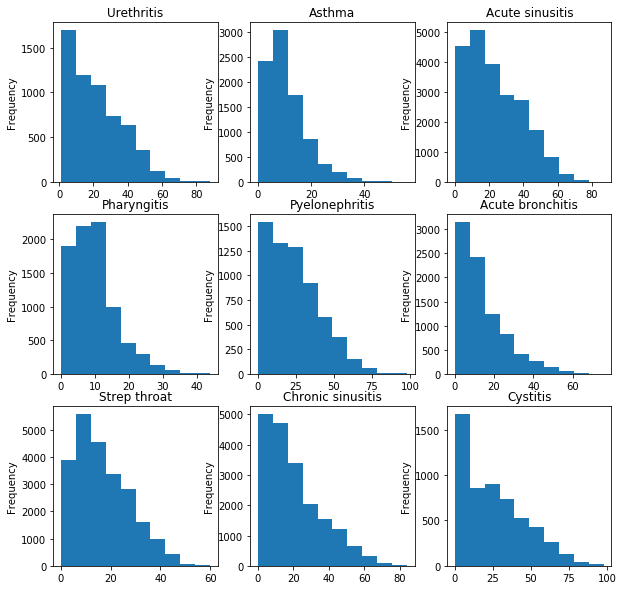

In [82]:
symptoms1_csv = pathutils.get_data_file("04_06_new_data/data/symptoms_04_16_4.csv")
symptoms1 = pd.read_csv(symptoms1_csv)
grp1 = symptoms1.groupby('PATHOLOGY')
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
idx = 0
for cond, df in grp1.__iter__():
    xdx = idx // 3
    ydx = idx % 3
    ax = axes[xdx][ydx]
    cond_name = condition_name_map[cond]
    ax.set_title(cond_name)
    plt.sca(ax)
    df.AGE_BEGIN.plot.hist()
    idx += 1

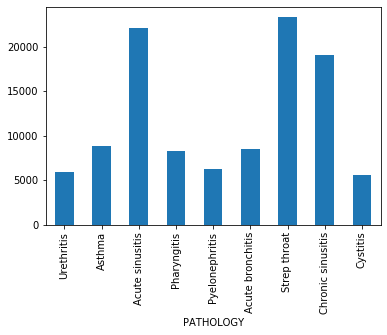

In [83]:
# how about size of each condition
dist = grp1.size()
dist.index = dist.index.map(lambda item: condition_name_map[item])
dist.plot.bar()

In [84]:
symptoms1.groupby('RACE').size()

RACE
asian      6513
black     10185
native      411
other       118
white     90694
dtype: int64

(array([841.,   0.,  96.,   0.,   0.,  70.,   0.,   4.,   0.,   2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

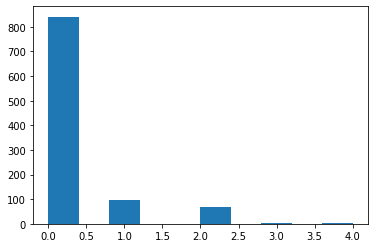

In [85]:
population_race = symptoms1.groupby('PATIENT').RACE
race1 = population_race.unique()
race1 = race1.map(lambda x: x[0])
race1 = race1.map(lambda x: race_map.get(x))
values = race1.values
plt.hist(values)

(array([105., 172., 156., 142., 138., 143., 107.,  34.,   7.,   9.]),
 array([  0. ,  10.8,  21.6,  32.4,  43.2,  54. ,  64.8,  75.6,  86.4,
         97.2, 108. ]),
 <a list of 10 Patch objects>)

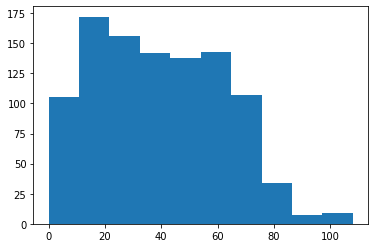

In [86]:
population_age = symptoms1.groupby('PATIENT').AGE
age1 = population_age.unique()
age1 = age1.map(lambda x: x[0])
values = age1.values
plt.hist(values)

In [91]:
# do probabilities sum to 1 ?
with open(generating_synthea_modules[0]) as fp:
    module = json.load(fp)

In [93]:
potential_infection = module.get('states').get('Potential_Infection')

In [96]:
transitions = potential_infection.get('complex_transition')

In [98]:
white_transitions = []
for transition in transitions:
    condition = transition.get('condition')
    rules = condition.get('conditions')
    for rule in rules:
        if rule.get('condition_type') == 'Race' and rule.get('race') == 'White':
            white_transitions.append(condition)
            break

In [110]:
trs = []
for mod in sorted(generating_synthea_modules):
    with open(mod) as fp:
        obj = json.load(fp)
    tr = obj.get('states').get('Potential_Infection').get('complex_transition')
    trs.append((obj.get('name'), len(tr)))

In [123]:
transition_list = []
for transition in transitions:
    conditions = transition.get('condition').get('conditions')
    gender = "null"
    race = "null"
    age = "null"
    others = ""
    
    for condition in conditions:
        condition_type = condition.get('condition_type')
        if condition_type == "Gender":
            gender = condition.get('gender')
        elif condition_type == "Race":
            race = condition.get('race')
        elif condition_type == 'Age':
            age = condition.get('operator') + str(condition.get('quantity'))
        elif condition_type == 'And' and 'conditions' in condition:
            subconditions = condition.get('conditions')
            agestr = ""
            exit = False
            for subcondition in subconditions:
                if subcondition.get('condition_type') == "Age":
                    agestr += subcondition.get('operator') + str(subcondition.get('quantity')) + " "
                else:
                    others += subcondition.get('condition_type')
                    exit = True
                    break
            if exit:
                continue
            age = agestr[:-1]
        else:
            others += condition.get('condition_type')
    desc = "%s-%s-%s-%s" % (gender, race, age, others)
    transition_list.append(desc)

In [ ]:
pharyngitis_module = sorted(generating_synthea_modules)[5]
with open(pharyngitis_module) as fp:
    pmod = json.load(fp)
transitions = pmod.get('states').get('Potential_Infection').get('complex_transition')
transition_list = []
for transition in transitions:
    conditions = transition.get('condition').get('conditions')
    gender = "null"
    race = "null"
    age = "null"
    others = ""
    
    for condition in conditions:
        condition_type = condition.get('condition_type')
        if condition_type == "Gender":
            gender = condition.get('gender')
        elif condition_type == "Race":
            race = condition.get('race')
        elif condition_type == 'Age':
            age = condition.get('operator') + str(condition.get('quantity'))
        elif condition_type == 'And' and 'conditions' in condition:
            subconditions = condition.get('conditions')
            agestr = ""
            exit = False
            for subcondition in subconditions:
                if subcondition.get('condition_type') == "Age":
                    agestr += subcondition.get('operator') + str(subcondition.get('quantity')) + " "
                else:
                    others += subcondition.get('condition_type')
                    exit = True
                    break
            if exit:
                continue
            age = agestr[:-1]
        else:
            others += condition.get('condition_type')
    desc = "%s-%s-%s-%s" % (gender, race, age, others)
    transition_list.append(desc)

# Update
Something is wrong with the advanced generator for symcat-synthea. 

Negative distribution values, distribution values > 1, shouldn't happen

Going back to the basics to what we had before. I'll eventually circle back and fix the bugs

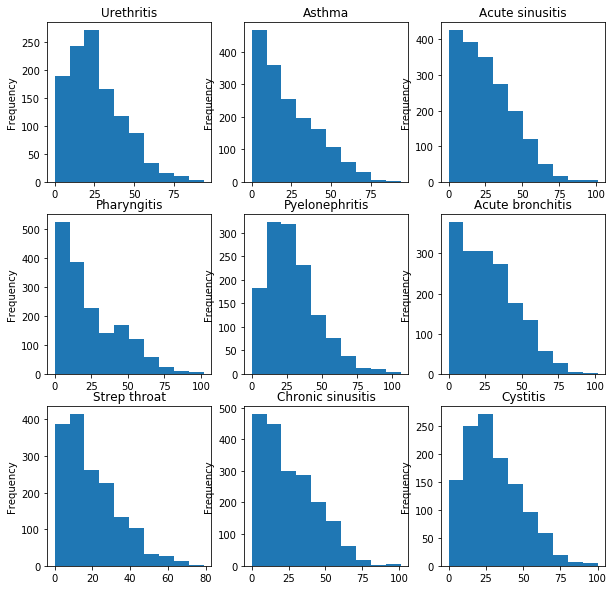

In [135]:
symptoms1_csv = pathutils.get_data_file("04_06_new_data/data/symptoms_04_16_5.csv")
symptoms1 = pd.read_csv(symptoms1_csv)
grp1 = symptoms1.groupby('PATHOLOGY')
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
idx = 0
for cond, df in grp1.__iter__():
    xdx = idx // 3
    ydx = idx % 3
    ax = axes[xdx][ydx]
    cond_name = condition_name_map[cond]
    ax.set_title(cond_name)
    plt.sca(ax)
    df.AGE_BEGIN.plot.hist()
    idx += 1

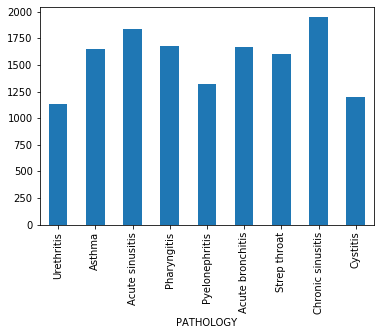

In [136]:
dist = grp1.size()
dist.index = dist.index.map(lambda item: condition_name_map[item])
dist.plot.bar()